<a href="https://colab.research.google.com/github/Kavish1504/House-Price-Prediction-Model/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
housing=pd.read_csv("data.csv")
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [2]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [3]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

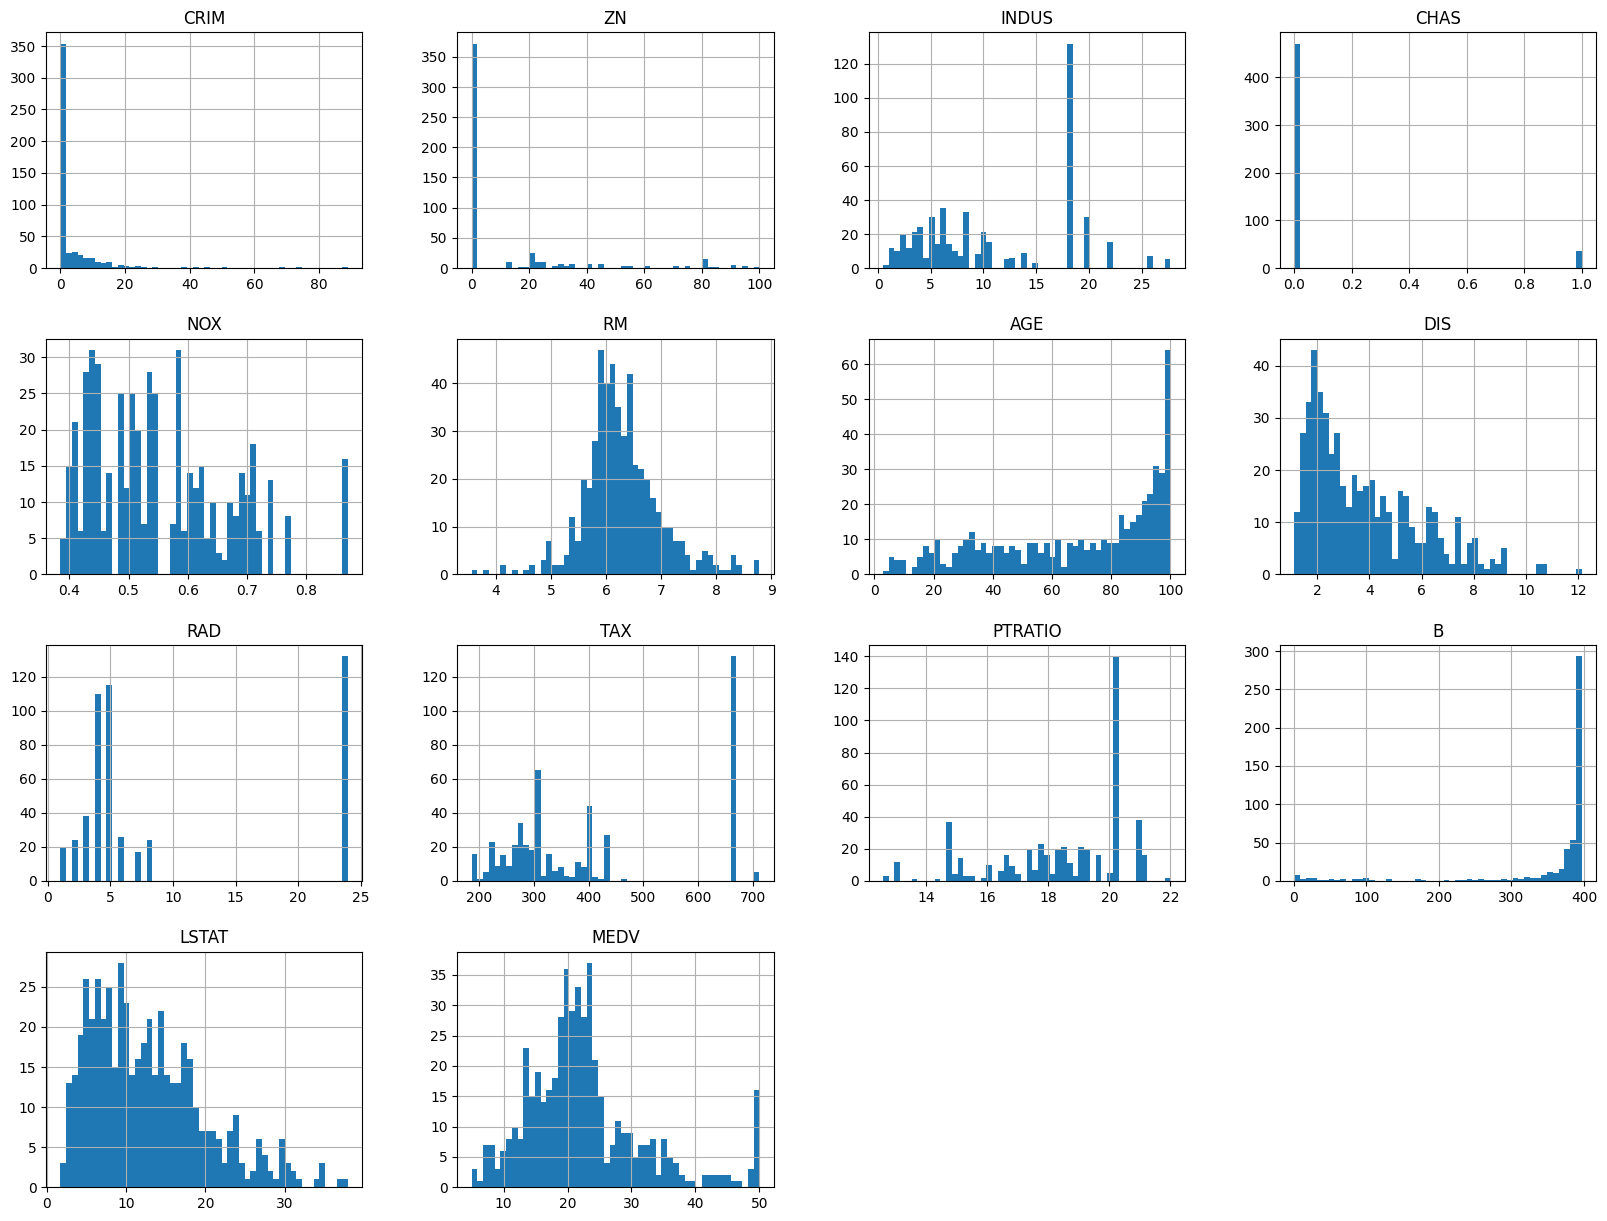

In [4]:
housing.hist(bins=50,figsize=(20,15))

In [5]:
def split_test_size(data,test_size):
  np.random.seed(42)
  shuffled=np.random.permutation(len(data))
  test_set_size=int(len(data)*test_size)
  test_set_indices=shuffled[:test_set_size]
  train_set_indices=shuffled[test_set_size:]
  return data.iloc[train_set_indices],data.iloc[test_set_indices]



In [6]:
train_set,test_set=split_test_size(housing,0.2)
print(f"Number of rows in train set are {len(train_set)} and in test set are {len(test_set)}")

Number of rows in train set are 405 and in test set are 101


In [7]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)


In [8]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['CHAS']):
  strat_train_set=housing.loc[train_index]
  strat_test_set=housing.loc[test_index]


In [9]:
strat_train_set['CHAS'].value_counts()

,count
CHAS,
0,376
1,28


In [10]:
housing=strat_train_set.copy()

In [11]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

,MEDV
MEDV,1.000000
RM,0.679894
B,0.361761
ZN,0.339741
DIS,0.240451
CHAS,0.205066
AGE,-0.364596
RAD,-0.374693
CRIM,-0.393715
NOX,-0.422873


array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

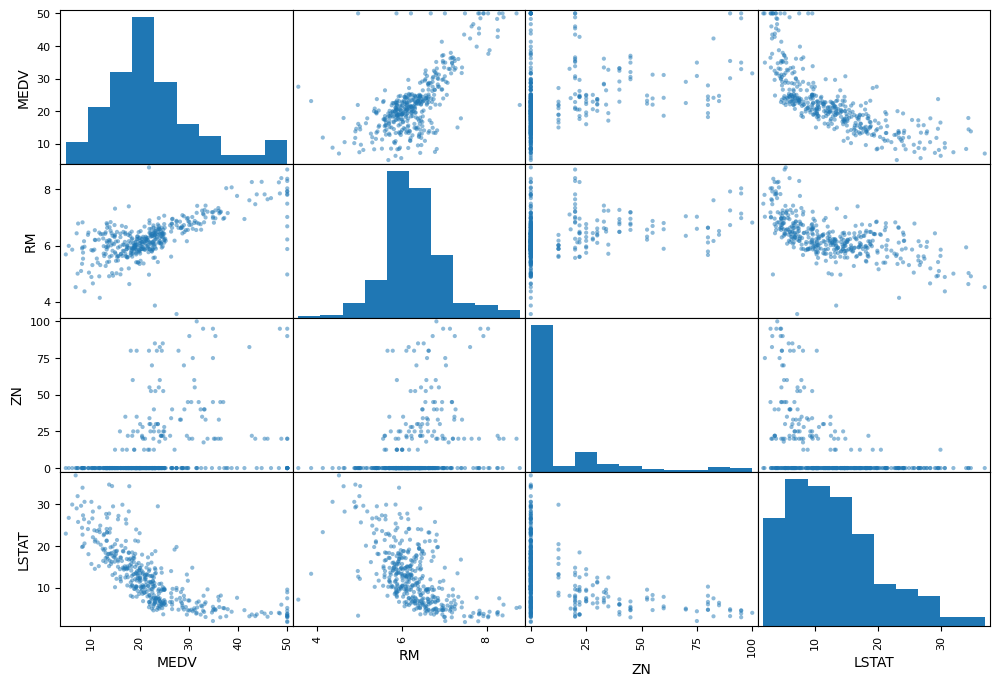

In [12]:
from pandas.plotting import scatter_matrix
attributes=["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing[attributes],figsize=(12,8))

<Axes: xlabel='MEDV', ylabel='RM'>

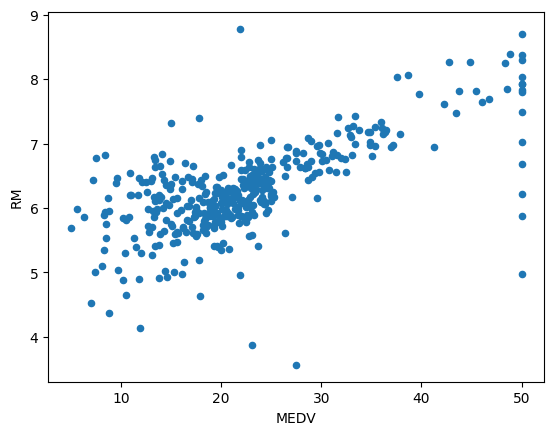

In [13]:
housing.plot(kind="scatter",x="MEDV",y="RM")

In [14]:
housing["TAXRM"]=housing['TAX']/housing['RM']
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [15]:
corr_matrix=housing.corr()
corr_matrix["MEDV"].sort_values(ascending=False)

,MEDV
MEDV,1.000000
RM,0.679894
B,0.361761
ZN,0.339741
DIS,0.240451
CHAS,0.205066
AGE,-0.364596
RAD,-0.374693
CRIM,-0.393715
NOX,-0.422873


In [16]:
# seperate the label from the training dataset
housing=strat_train_set.drop("MEDV",axis=1)
housing_labels=strat_train_set["MEDV"].copy()

In [17]:
# a=housing.dropna(subset=["RM"])
# a.shape
median=housing['RM'].median()
# Fill missing values
housing['RM'].fillna(median)

,RM
254,6.108
348,6.635
476,6.484
321,6.376
326,6.312
...,...
155,6.152
423,6.103
98,7.820
455,6.525


In [18]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
# Train the model
imputer.fit(housing)
X=imputer.transform(housing)
housing_tr=pd.DataFrame(X,columns=housing.columns)

In [19]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279908,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712983,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([
    ('imputer',SimpleImputer()),
    ('std_scaler',StandardScaler())
])

In [21]:
housing_num_tr=my_pipeline.fit_transform(housing)
housing_num_tr.shape

(404, 13)

In [22]:
# Initialize the machine learning model
# We are using here 3 different models to compare their accuracy
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model=LinearRegression()
# model=DecisionTreeRegressor()
model=RandomForestRegressor()
# Train the model
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [23]:
sample_data=housing.iloc[:5]
sample_labels=housing_labels.iloc[:5]
prepared_data=my_pipeline.transform(sample_data)
# Make predictions on the test set
model.predict(prepared_data)


array([22.508, 25.587, 16.363, 23.376, 23.391])

In [24]:
list(sample_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

In [25]:
# Evaluate the model using RMSE or cross-validation
from sklearn.metrics import mean_squared_error
# Make predictions on the test set
housing_predictions=model.predict(housing_num_tr)
mse=mean_squared_error(housing_labels,housing_predictions)
rmse=np.sqrt(mse)


In [26]:
mse

1.3529252128712854

In [27]:
# Evaluate the model using RMSE or cross-validation
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,housing_num_tr,housing_labels,cv=10,scoring="neg_root_mean_squared_error")
rmse_scores=np.sqrt(-scores)
rmse_scores


array([1.67119469, 1.64146763, 2.09766273, 1.6030358 , 1.82502996,
       1.62076268, 2.18404979, 1.80942866, 1.83950595, 1.77958341])

In [28]:
print(rmse_scores.mean())
print(rmse_scores.std())

1.8071721309659423
0.18732862633814518


In [29]:
from joblib import dump,load
dump(model,'Prediction.joblib')

['Prediction.joblib']

In [30]:
X_test=strat_test_set.drop("MEDV",axis=1)
Y_test=strat_test_set["MEDV"].copy();
prepared_test=my_pipeline.transform(X_test)
# Make predictions on the test set
final_predictions=model.predict(prepared_test)
final_mse=mean_squared_error(Y_test,final_predictions)
final_rmse=np.sqrt(final_mse)
print(final_predictions,list(Y_test))
final_rmse

[24.895 11.466 25.439 21.974 18.471 14.873 19.897 14.416 31.435 40.68
 20.067 11.776 24.004 28.999 19.503 10.679 31.58  14.492 23.586 18.94
 19.767 17.955 17.534 22.073 18.429 30.549 16.416 32.69   8.952 33.616
 23.715 21.26  22.98  10.808 20.924 11.293 42.541 24.308 23.292 41.623
 23.753 29.423 20.594 20.912 19.565 33.578 44.468 19.92  20.344 21.768
 21.492 14.514 21.169 15.094 24.771 32.651 42.389 28.135 19.353 20.837
 47.322  9.96  18.674 24.579 15.057 32.746 19.461 18.158 19.014 33.84
 27.27  22.85  21.519 22.436 34.997 12.793 15.94  20.048 20.726 21.379
 22.303 21.651 14.429 22.832 20.848 21.168 13.933 21.346 22.005 23.151
 18.865 27.24   7.276 26.14  18.817 29.887 19.692 31.073 14.663 26.607
 20.713 20.087] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1, 4

np.float64(2.948844070638726)

In [31]:
from joblib import dump,load
model=load('Prediction.joblib')
features=np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.71164221, -0.86091034]])
# Make predictions on the test set
model.predict(features)

array([22.546])